# Final Report - Data Science 
## Bachelor in Computer Science / PUCPR

Professor Jean Paul Barddal

`Bruno Thuma` - `bruno.thuma@hotmail.com`

`Gustavo Hammerschmidt` - `gustavocrazy@yahoo.com`

`Leonardo Cleyton` - `leo_cleyton@hotmail.com`

`Lucas Lourenço Dall Agnol` - `lucas_ppl@live.com`

`Victor Marcel Vieira` - `e255270@outlook.com`

`2020`

# Import the libs you need

In [1]:
# Standard libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Statistics measurements.
from statsmodels.stats.outliers_influence import variance_inflation_factor # Statistics measurements.
from pylab import rcParams

#########################################################
#########################################################

# Drive Authentication libraries used to connect to the database:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

########################################################
########################################################

# Libraries used on Machine Learning Section:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler

!pip install xgboost
from xgboost import XGBClassifier
import xgboost as lib_xgb

########################################################
########################################################

# Libraries used to download predictions' csv file:
from google.colab import drive
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.

Please change the csv links to your drive database

In [2]:
# LOAD YOUR DATA HERE:

#########################################################
#########################################################

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#########################################################
#########################################################

# LINKS TO THE DATABASE TRAINING, TESTING AND DESCRIPTION FILES:
CSV_TRAIN_FILE_LINK = "https://drive.google.com/file/d/1yyev_-wV1KCuflo71nsPXkrAQCPj2teB/view?usp=sharing"
id_train_set = CSV_TRAIN_FILE_LINK.split('/')[-2]

CSV_TEST_FILE_LINK = "https://drive.google.com/file/d/1TWbp7bYhU5BwjReZEIHt018BBeG043cC/view?usp=sharing"
id_test_set = CSV_TEST_FILE_LINK.split("/")[-2]

DESCRIPTION_FILE_LINK = "https://drive.google.com/file/d/1qblVwABXSrtSolBMAUkCucZ0i5UKyvak/view?usp=sharing"
id_description = DESCRIPTION_FILE_LINK.split("/")[-2]

#########################################################
#########################################################

# DOWNLOADING THE TRAIN FILE ON MEMORY AND OPENING IT WITH PANDAS:
downloaded = drive.CreateFile({'id':id_train_set})
downloaded.GetContentFile('train_file.csv')  

df = pd.read_csv('train_file.csv', na_values=-9999.0, sep=',', error_bad_lines=False)
df["SAFRA"] = "TRAIN"

#########################################################
#########################################################

# DOWNLOADING THE TEST FILE ON MEMORY AND OPENING IT WITH PANDAS:
downloaded_t = drive.CreateFile({'id':id_test_set})
downloaded_t.GetContentFile('test_file.csv')  

df_test = pd.read_csv('test_file.csv', na_values=-9999.0, sep=',', error_bad_lines=False)
df_test["SAFRA"] = "TEST"

#########################################################
#########################################################

# DOWNLOADING THE DESCRIPTION FILE ON MEMORY AND OPENING IT WITH PANDAS:
downloaded = drive.CreateFile({'id':id_description})
downloaded.GetContentFile('description_file.xlsx') 

df_description = pd.DataFrame(pd.read_excel("description_file.xlsx")) 

#########################################################
#########################################################

In [3]:
# CLEAN AND TREAT THE DATA HERE:

In [4]:
# SETTING ASSESSMENT FUNCTIONS TO CHECK THE DATABASE STATUS THROUGHOUT EXECUTION ON THE FLY:

#########################################################
#########################################################

# GRAB THE COLUMNS' NAME:
col_names = lambda x: "\n".join(["Coluna "+str(i)+": "+str(x.columns[i]) for i in range(0, len(x.columns))])

#########################################################
#########################################################

# NUMBER OF LINES IN DATAFRAME:
n_lines = lambda x: x.shape[0]

# NUMBER OF COLUMNS IN DATAFRAME:
n_columns = lambda x: x.shape[1]

#########################################################
#########################################################

# REMOVE COLUMNS FROM DATAFRAME:
remove_columns = lambda x, columns: x.drop(labels=columns, axis=1, inplace=True)

def remove_from_dataframe(df, columns):
    for i in [col_names(df).find(x) for x in columns]:
        if i == -1:
            return "Columns weren't found!" 
    remove_columns(df, columns)
    return "Columns removed!"

#########################################################
#########################################################

# SPECIFICATIONS ON COLUMNS WITH NON MULTIVALUES:
def specifications(df, multivalue=False):
    names, values_of_name = [x for x in df.columns], [df[x].unique() for x in df.columns]
    n_values = [ (str(x) if len(x) < 15 else 'multivalue') for x in values_of_name] 
    ret = [("Name: "+names[x]+", values = "+n_values[x] if n_values[x]!='multivalue' else "") for x in range(0, len(names))],
    ret2 = [("Name: "+names[x]+", values = "+n_values[x]) for x in range(0, len(names))]
    return ("\n".join(filter(lambda x : x != "", ret)) if not multivalue else "\n".join(ret2))

#########################################################
#########################################################

# Number of missing values by column:
missing_values = lambda x: pd.DataFrame(np.array([x[i].isna().sum() for i in df.columns]),index=df.columns).T

#########################################################
#########################################################

#Column name description:
description = lambda name: df_description[df_description["FINALNOME"] == str(name)].T.iloc[1, 0]

#########################################################
#########################################################


In [5]:
# REMOÇÃO DE COLUNAS:
remove_from_dataframe(df, {"ORIENTACAO_SEXUAL", "RELIGIAO"})
remove_from_dataframe(df_description, {'Unnamed: 2'})

# Remoção de valores descritivos iguais a na:
df_description = df_description[df_description['DESCRIÇÃO'].notna()]

In [6]:
# use as many code and text cells you wish

In [7]:
# Descrição das variáveis:
[print(x+":  "+description(x)+"\n") for x in df.columns]
''

HS_CPF:  Valor MD5 do CPF em hexadecimal

TEMPOCPF:  Tempo (em anos) desde a emissão do CPF

DISTCENTROCIDADE:  Distância (em metros) do CEP informado ao centro da cidade

DISTZONARISCO:  Distância (em metros) da zona de risco mais próxima.

QTDENDERECO:  Quantos endereços distintos o proponente possui na base 

QTDEMAIL:  Quantos emails distintos o proponente possui na base 

QTDCELULAR:  Quantos telefones celulares distintos o proponente possui na base 

CELULARPROCON:  Proponente possui telefone celular incluido no procon

QTDFONEFIXO:  Quantos telefones fixos distintos o proponente possui na base 

TELFIXOPROCON:  Proponente possui telefone fixo incluido no procon

INDICEEMPREGO:  Indice de estabilidade do CPF no emprego

PORTEEMPREGADOR:  Porte da empresa em que o CPF trabalha

SOCIOEMPRESA:  Flag indicativo se o CPF participa de alguma empresa

FUNCIONARIOPUBLICO:  Flag indicativo se o CPF é um funcionário público

SEGMENTACAO:  Indice de segmentação total nos últimos 12 meses

S

''

# Univariate data analysis

In this section, you should perform univariate data analysis on at least 20 variables. 

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (gaussian, binomial, exponential, etc)
2. Skew
3. Kurtosis
4. Mean, standard deviation, and what they stand for in the context of the dataset

Regardless of the type of the variable being analyzed, make sure you plot it correctly. For instance, make sure scatterplots are not used for categorical data and so forth.

In [8]:
# place as many cells to plot the visualizations, 
# as well as to describe the main findings.

## Univariate - Funções

In [9]:
# SETTING ASSESSMENT FUNCTIONS TO CHECK THE DATABASE THROUGHOUT EXECUTION ON THE FLY:

#########################################################
#########################################################

# GET REPARTITION OF DATAFRAME BY DIVISION AS MENCIONED ON DICTIONARY.XLSX:
# WARNING: 'SAFRA' COLUMN WAS NOT FOUND IN DATAFRAME, THEREFORE, WAS REMOVED. 
#    -> USE THE FOLLOWING CODE TO CHECK THE INEXISTANCE:  print(col_names(df).find("SAFRA"))
#    -> OUR TEAM HAS CHECKED THE DICTIONARY FOR EXPLANANTION: APPARENTLY, SAFRA REFERS TO THE SAMPLE SET IT WAS OBTAINED:
#    -> IN THIS CASE, MEANING THAT THE SET IS EITHER 'TRAIN' OR 'TEST'.
def splitted_df_block(df, block_index):
    names = dict()
    names["basicas"], names["renda"], names["empresarial"], names["familiar"], names["regional"] = 0,1,2,3,4
    indexes = [["HS_CPF","SAFRA","TEMPOCPF", "DISTCENTROCIDADE", "DISTZONARISCO","QTDENDERECO", "QTDEMAIL", "QTDCELULAR",
                "CELULARPROCON", "QTDFONEFIXO", "TELFIXOPROCON", "TARGET"],  # Colunas básicas;
                ["ESTIMATIVARENDA","QTDDECLARACAOISENTA","QTDDECLARACAO10","QTDDECLARACAOREST10","QTDDECLARACAOPAGAR10",
                  "RESTITUICAOAGENCIAALTARENDA","BOLSAFAMILIA","ANOSULTIMARESTITUICAO","ANOSULTIMADECLARACAO","ANOSULTIMADECLARACAOPAGAR"], # Renda;
                ["INDICEEMPREGO", "PORTEEMPREGADOR", "SOCIOEMPRESA", "FUNCIONARIOPUBLICO", "SEGMENTACAO",
                  "SEGMENTACAOCOBRANCA", "SEGMENTACAOECOM", "SEGMENTACAOFIN", "SEGMENTACAOTELECOM"], # Empresarial;
                ["QTDPESSOASCASA","MENORRENDACASA","MAIORRENDACASA","SOMARENDACASA","MEDIARENDACASA","MAIORIDADECASA",
                  "MENORIDADECASA","MEDIAIDADECASA","INDICMENORDEIDADE","COBRANCABAIXOCASA","COBRANCAMEDIOCASA","COBRANCAALTACASA",
                  "SEGMENTACAOFINBAIXACASA","SEGMENTACAOFINMEDIACASA","SEGMENTACAOALTACASA","BOLSAFAMILIACASA","FUNCIONARIOPUBLICOCASA"], #Familiar;
                [
                  "IDADEMEDIACEP","PERCENTMASCCEP","PERCENTFEMCEP","PERCENTANALFABETOCEP","PERCENTPRIMARIOCEP","PERCENTFUNDAMENTALCEP","PERCENTMEDIOCEP",
                  "PERCENTSUPERIORCEP","PERCENTMESTRADOCEP","PERCENTDOUTORADOCEP","PERCENTBOLSAFAMILIACEP","PERCENTFUNCIONARIOPUBLICOCEP","MEDIARENDACEP","PIBMUNICIPIO",
                  "QTDUTILITARIOMUNICIPIO","QTDAUTOMOVELMUNICIPIO","QTDCAMINHAOMUNICIPIO","QTDCAMINHONETEMUNICIPIO","QTDMOTOMUNICIPIO","PERCENTPOPZONAURBANA","IDHMUNICIPIO" ] # Regional.
    ]
    return df[indexes[block_index]] if not isinstance(block_index, str) else df[indexes[names[block_index.lower()]]]

#########################################################
#########################################################

# PLOT ANALYSIS FUNCTIONS:
standard_plot_functions = [
                           
      ['distplot', lambda df, var, ignore: sns.distplot(df[var].dropna())],
      ['countplot', lambda df, var, ignore: sns.countplot(df[var].dropna())],
      ['boxplot', lambda df, var, var2: sns.boxplot(df[var].dropna()) if var2 == None else sns.boxplot(x=df[var].dropna(), y=df[var2].dropna())],
      ['violinplot', lambda df, var, var2: sns.violinplot(df[var].dropna()) if var2 == None else sns.violinplot(x=df[var].dropna(), y=df[var2].dropna())],
      ['hist', lambda df, var, ignore: df[var].hist()],
      ['pizza', lambda df, var, ignore: df[var].dropna().value_counts().plot(kind='pie', autopct='%1.1f%%')],
      ['distplot_kne', lambda df, var, ignore: sns.distplot(df[var].dropna(), kde=False, bins=10)],
      ['describe', lambda df, ignore, ignore2: df.describe()], 
      ['corr', lambda df, ignore, ignore2: df.corr()], 
      ['head', lambda df, var, limit: df[var].head(limit)],
      ['jointplot', lambda df, var, var2: sns.jointplot(df[var], df[var2], kind='kde')],
      ['scatterplot', lambda df, var, var2: sns.scatterplot(df[var], df[var2])],
      ['swarmplot',  lambda df, var, var2: sns.swarmplot(df[var], df[var2])],
      ['bubbleplot', lambda df, var, var2: plt.scatter(df[var], df[var2], s=np.random.rand(n_lines(df))*1000, alpha=0.5)],
      ['barplot', lambda df, var, var2: sns.barplot(df[var], df[var2], palette="Blues_d")]

]

#########################################################
#########################################################

# PLOT ANALYSIS FUNCTIONS:
additional_plot_functions = [
                             
    ['scatterplot_op', lambda df, var, var2, s_, alpha_: sns.scatterplot(df[var], df[var2], s=s_, alpha=alpha_)],
    ['stripplot', lambda df, var, var2, jitter_, size_: sns.stripplot(df[var], df[var2], jitter=jitter_, size=size_)],
    ['kdeplot', lambda df, var, var2, shade_, ignore: sns.kdeplot(df[var], df[var2], shade=shade_)]
    
]

#########################################################
#########################################################

# PLOT ANALYSIS FUNCTIONS:
final_plot_functions = [
                  
    ['scatterplot_f', lambda df, var, var2: sns.scatterplot(df[var], df[var2], marker='D', hue=df[var], palette="YlOrBr", size=25, edgecolor="gray", alpha=0.6)],
    ['stripplot_f', lambda df, var, var2: sns.stripplot(df[var], df[var2],hue=df[var], palette="inferno", size=12, marker="o", edgecolor="gray", jitter=0.4, alpha=0.25)],
    ['scatterplot_f2', lambda df, var, var2: sns.scatterplot(df[var], df[var2], marker='D', hue=df[var2], palette="YlOrBr", size=20, edgecolor="gray", alpha=0.7)] 

]

#########################################################
#########################################################

# Plot Information:
distribution_arr, skew_arr, kurtosis_arr = ['Gaussian', 'Binomial', 'Exponential', 'Beta'], ['Positive', 'Negative', 'Zero'], ['Platykurtic', 'Mesokurtic', 'Leptocurtic']

def info_plot(df, name, distribution, skew, kurtosis, more):
    global distribution_arr, skew_arr, kurtosis_arr   
    print('\nDistribution: {}\nSkew: {}\nKurtosis: {}\nMean: {}\nStd: {}\nMore Info: {}'.format(distribution_arr[distribution],skew_arr[skew],kurtosis_arr[kurtosis],
                                                                                                df[name].mean(), df[name].std(), more))
#########################################################
#########################################################

# BRIDGE IN-BETWEEN NAME-FUNCTIONALITY CONNECTION:
types = dict()
for match in standard_plot_functions:
    types[match[0]] = match[1]

for match in additional_plot_functions:
    types[match[0]] = match[1]
  
for match in final_plot_functions:
    types[match[0]] = match[1]

#########################################################
#########################################################

# PLOT ANALYSIS FUNCTION:
# Easy caller to plot in one line:
def plot(df, type_, var1=None, var2=None, options=[], title=None, x_axis_name=None, y_axis_name=None, darkgrid=True, is_subplot=False,
         subplot_index=(), final_subplot=False, info=(), show_info=False, define_size=False, sizeP=()):
    
    global types, SUBPLOT_COUNTER
    print("\n")
    call_names = [i[0] for i in standard_plot_functions]
    call_names.append(i[0] for i in additional_plot_functions)
    
    if darkgrid:
        sns.set(style='darkgrid')
    
    if is_subplot:
        plt.subplot(*subplot_index)
    
    if define_size:
        rcParams['figure.figsize'] = sizeP
    else:
        rcParams['figure.figsize'] = (6,4)

    if type_ in ['scatterplot_op', 'stripplot', 'kdeplot']:
        types[type_](df, var1, var2, options[0], None) if type_ == 'kdeplot' else types[type_](df, var1, var2, options[0], options[1])

    elif type_ in ['describe', 'corr']:
        return types[type_](df, None, None)

    elif type_ in [i[0] for i in standard_plot_functions]:
        types[type_](df, var1, var2)

    # ADD MORE OPTIONS 
    elif type_ in ['scatterplot_f', 'stripplot_f', 'scatterplot_f2']:
        types[type_](df, var1, var2,*options)

    elif type_ not in call_names:
        return 'Type not found!'

    plt.xlabel(x_axis_name if x_axis_name else "the X axis")
    plt.ylabel(y_axis_name if y_axis_name else "the Y axis")
    plt.title(title if title else '', loc="left")   

    if final_subplot:
        plt.show()
        if show_info:
            info_plot(df, *info)
    else:
        plt.show()
        if show_info:
            info_plot(df, *info)

#########################################################
#########################################################

# GET ONLY 'SET-VALUED' COLUMN NAMES:
non_multivalued_vars = lambda df: [x for x in df.columns if len(df[x].unique()) < 15]
df_snippet = lambda df: pd.DataFrame(np.array([str(df[x].unique()) if len(df[x].unique()) < 15 else 'multivalue' for x in df.columns]),index=df.columns).T

#########################################################
#########################################################


## Univariate - Separação do df

In [10]:
# if you realize you need to further clean your data here, there is no problem, 
# yet, make sure you are describing the entire process and the rationale 
# behind your choices here

# REPARTIONING OF THE DAFRAME BY BLOCKS RELATED TO DICTIONARY:
df_basicas, df_renda = splitted_df_block(df, "basicas"), splitted_df_block(df, "renda")
df_empresarial, df_familiar = splitted_df_block(df, "empresarial"), splitted_df_block(df, "familiar")
df_regional = splitted_df_block(df, "regional")


# CHECKING NUMBER OF NON-MULTIVALUED COLUMNS ON EACH PARTITION:
occurrences = lambda df, df_block: len([x for x in non_multivalued_vars(df) if x in df_block.columns])

print("Non-multivalued vars in df_basicas:", occurrences(df, df_basicas), 
      "\nNon-multivalued vars in df_renda:", occurrences(df, df_renda),
      "\nNon-multivalued vars in df_empresarial:", occurrences(df, df_empresarial),
      "\nNon-multivalued vars in df_familiar:", occurrences(df, df_familiar),
      "\nNon-multivalued vars in df_regional:", occurrences(df, df_regional))

Non-multivalued vars in df_basicas: 4 
Non-multivalued vars in df_renda: 2 
Non-multivalued vars in df_empresarial: 9 
Non-multivalued vars in df_familiar: 10 
Non-multivalued vars in df_regional: 1


## Univariate - Display de colunas com sets de valores

In [11]:
df_snippet(df)

,HS_CPF,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,PORTEEMPREGADOR,SOCIOEMPRESA,FUNCIONARIOPUBLICO,SEGMENTACAO,SEGMENTACAOCOBRANCA,SEGMENTACAOECOM,SEGMENTACAOFIN,SEGMENTACAOTELECOM,QTDPESSOASCASA,MENORRENDACASA,MAIORRENDACASA,SOMARENDACASA,MEDIARENDACASA,MAIORIDADECASA,MENORIDADECASA,MEDIAIDADECASA,INDICMENORDEIDADE,COBRANCABAIXOCASA,COBRANCAMEDIOCASA,COBRANCAALTACASA,SEGMENTACAOFINBAIXACASA,SEGMENTACAOFINMEDIACASA,SEGMENTACAOALTACASA,BOLSAFAMILIACASA,FUNCIONARIOPUBLICOCASA,IDADEMEDIACEP,PERCENTMASCCEP,PERCENTFEMCEP,PERCENTANALFABETOCEP,PERCENTPRIMARIOCEP,PERCENTFUNDAMENTALCEP,PERCENTMEDIOCEP,PERCENTSUPERIORCEP,PERCENTMESTRADOCEP,PERCENTDOUTORADOCEP,PERCENTBOLSAFAMILIACEP,PERCENTFUNCIONARIOPUBLICOCEP,MEDIARENDACEP,PIBMUNICIPIO,QTDUTILITARIOMUNICIPIO,QTDAUTOMOVELMUNICIPIO,QTDCAMINHAOMUNICIPIO,QTDCAMINHONETEMUNICIPIO,QTDMOTOMUNICIPIO,PERCENTPOPZONAURBANA,IDHMUNICIPIO,ESTIMATIVARENDA,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TARGET,SAFRA
0,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,[ 0. 1. nan],multivalue,[ 0. 1. nan],[ 0. 4. 6. 1. 5. 3. 2. nan],[ 0. 1. 2. 3. 4. nan],[ 0. 1. nan],[ 0. 1. nan],[ 0. 1. 3. 2. 4. 5. nan],[ 0. 3. 1. 4. nan 2. 5.],[ 0. 1. nan 5. 2. 4. 3.],[ 0. 1. 2. nan 3. 4. 5.],[ 0. 3. 1. 2. 4. nan 5.],[ 2. nan 3. 4. 5. 6. 9. 7. 8. 10.],multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 1. nan 0.],[ 0. nan 1.],multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,[ 0. nan 1. 2. 3. 7. 5. 4. 6. 8.],multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,[ 0. 1. nan],[ 0. 1. nan],multivalue,multivalue,multivalue,[0. 1.],['TRAIN']


## Univariate - Variável 1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


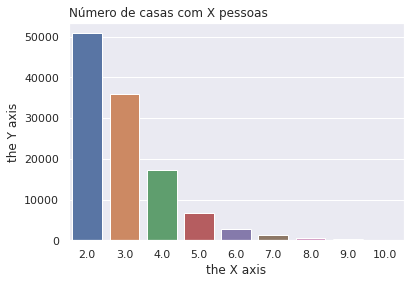


Distribution: Gaussian
Skew: Positive
Kurtosis: Mesokurtic
Mean: 2.994602250645571
Std: 1.2306877807879248
More Info: 
		""Descrição: A informação foi selecionada como indicativo de pessoas por casa.""

		""Variável QTDPESSOASCASA: Quantidade de pessoas no household""



In [12]:
why = '\n\t\t""Descrição: A informação foi selecionada como indicativo de pessoas por casa.""\n'
var = '\n\t\t""Variável QTDPESSOASCASA: '+description('QTDPESSOASCASA')+'""\n'
plot(df, 'countplot', 'QTDPESSOASCASA', title='Número de casas com X pessoas', info=('QTDPESSOASCASA', 0,0,1,why+var), show_info=True)

## Univariate - Variável 2

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


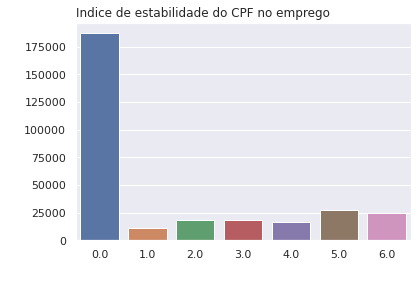


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 1.4945635689889358
Std: 2.1520671583443103
More Info: 
		""A informação foi selecionada como indicativo de possibilidade de demissão ou segurança de recebimento de uma renda "fixa".""

		""Variável INDICEEMPREGO: Indice de estabilidade do CPF no emprego""



In [13]:
why = '\n\t\t""A informação foi selecionada como indicativo de possibilidade de demissão ou segurança de recebimento de uma renda "fixa".""\n'
var = '\n\t\t""Variável INDICEEMPREGO: '+description('INDICEEMPREGO')+'""\n'
plot(df, 'countplot', "INDICEEMPREGO", title=description('INDICEEMPREGO'), y_axis_name=' ', x_axis_name=' ', info=('INDICEEMPREGO', 0,0,2,why+var), show_info=True) 

## Univariate - Variável 3

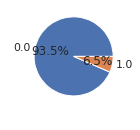

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


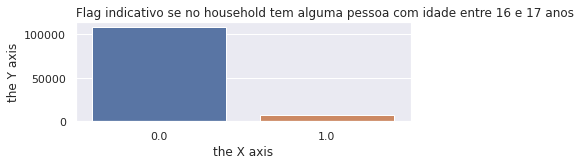


Distribution: Binomial
Skew: Positive
Kurtosis: Mesokurtic
Mean: 0.06496299303042603
Std: 0.24646161399000016
More Info: 
		""A informação foi selecionada como um indício de que há um integrante na família que não gera renda possivelmente.""

		""Variável INDICMENORDEIDADE: Flag indicativo se no household tem alguma pessoa com idade entre 16 e 17 anos""



In [14]:
why = '\n\t\t""A informação foi selecionada como um indício de que há um integrante na família que não gera renda possivelmente.""\n'
var = '\n\t\t""Variável INDICMENORDEIDADE: '+description('INDICMENORDEIDADE')+'""\n'
plot(df, 'pizza', 'INDICMENORDEIDADE', is_subplot=True, subplot_index=(2,1,1), y_axis_name=' ', x_axis_name=' ') 
plot(df, 'countplot', 'INDICMENORDEIDADE', title=description('INDICMENORDEIDADE'), is_subplot=True, subplot_index=(2,1,2), final_subplot=True, info=('INDICMENORDEIDADE', 1,0,1,why+var), show_info=True)

## Univariate - Variável 4

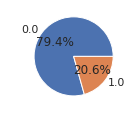

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


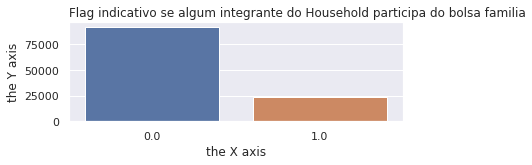


Distribution: Binomial
Skew: Positive
Kurtosis: Mesokurtic
Mean: 0.20632357132370088
Std: 0.40466723304277713
More Info: 
		""O gráfico foi selecionado devido ao plano Bolsa Família ser um indicativo de baixa renda e número de pessoas por caso alto.""

		""Variável BOLSAFAMILIACASA: Flag indicativo se algum integrante do Household participa do bolsa familia""



In [15]:
why = '\n\t\t""O gráfico foi selecionado devido ao plano Bolsa Família ser um indicativo de baixa renda e número de pessoas por caso alto.""\n'
var = '\n\t\t""Variável BOLSAFAMILIACASA: '+description('BOLSAFAMILIACASA')+'""\n'
plot(df, 'pizza', 'BOLSAFAMILIACASA', is_subplot=True, subplot_index=(2,1,1), y_axis_name=' ', x_axis_name=' ') 
plot(df, 'countplot', 'BOLSAFAMILIACASA', title=description('BOLSAFAMILIACASA'), is_subplot=True, subplot_index=(2,1,2), final_subplot=True, info=('BOLSAFAMILIACASA', 1,0,1,why+var), show_info=True)

## Univariate - Variável 5

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


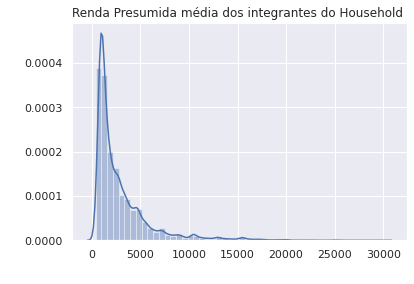


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 2904.787539849147
Std: 2989.041412379359
More Info: 
		""A informação foi selecionada como indicativo de renda média por household.""

		""Variável MEDIARENDACASA: Renda Presumida média dos integrantes do Household""



In [16]:
why = '\n\t\t""A informação foi selecionada como indicativo de renda média por household.""\n'
var = '\n\t\t""Variável MEDIARENDACASA: '+description('MEDIARENDACASA')+'""\n'
plot(df, 'distplot', "MEDIARENDACASA", title=description('MEDIARENDACASA'), y_axis_name=' ', x_axis_name=' ', info=('MEDIARENDACASA', 0,0,2,why+var), show_info=True) 

## Univariate - Variável 6

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


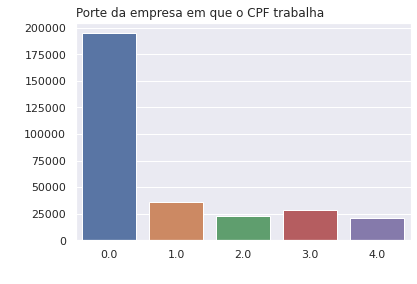


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.8319354881249094
Std: 1.3023443785317785
More Info: 
		""A informação foi selecionada como indicativo de quantos CPFs por empresa estão no ranking de 0 a 4.""

		""Variável PORTEEMPREGADOR: Porte da empresa em que o CPF trabalha""



In [17]:
why = '\n\t\t""A informação foi selecionada como indicativo de quantos CPFs por empresa estão no ranking de 0 a 4.""\n'
var = '\n\t\t""Variável PORTEEMPREGADOR: '+description('PORTEEMPREGADOR')+'""\n'
plot(df, 'countplot', "PORTEEMPREGADOR", title=description('PORTEEMPREGADOR'), y_axis_name=' ', x_axis_name=' ', info=('PORTEEMPREGADOR', 0,0,2,why+var), show_info=True) 

## Univariate - Variável 7

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


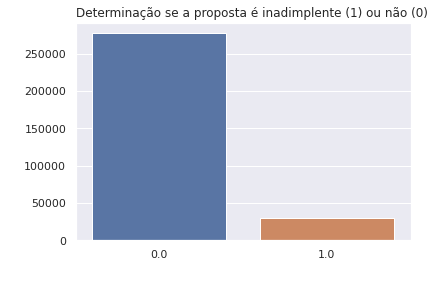


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.09640847751596937
Std: 0.29515109089178676
More Info: 
		""A informação foi selecionada como indicativo de proposta inadimplente ou não.""

		""Variável TARGET: Determinação se a proposta é inadimplente (1) ou não (0)""



In [18]:
why = '\n\t\t""A informação foi selecionada como indicativo de proposta inadimplente ou não.""\n'
var = '\n\t\t""Variável TARGET: '+description('TARGET')+'""\n'
plot(df, 'countplot', "TARGET", title=description('TARGET'), y_axis_name=' ', x_axis_name=' ', info=('TARGET', 0,0,2,why+var), show_info=True) 

## Univariate - Variável 8

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


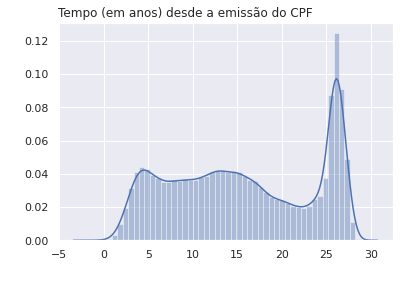


Distribution: Gaussian
Skew: Negative
Kurtosis: Leptocurtic
Mean: 15.736359878792248
Std: 7.988362018707247
More Info: 
		""A informação foi selecionada como indicativo de quanto tempo o CPF já teve para declarar imposto.""

		""Variável TEMPOCPF: Tempo (em anos) desde a emissão do CPF""



In [19]:
why = '\n\t\t""A informação foi selecionada como indicativo de quanto tempo o CPF já teve para declarar imposto.""\n'
var = '\n\t\t""Variável TEMPOCPF: '+description('TEMPOCPF')+'""\n'
plot(df, 'distplot', "TEMPOCPF", title=description('TEMPOCPF'), y_axis_name=' ', x_axis_name=' ', info=('TEMPOCPF', 0,1,2,why+var), show_info=True)

## Univariate - Variável 9

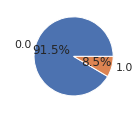

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


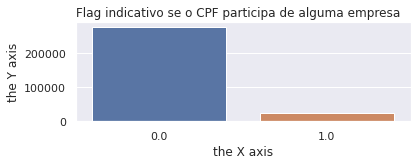


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.08483997309807335
Std: 0.2786438731331874
More Info: 
		""A informação foi selecionada como um indício se o CPF possuí uma participação em empresas.""

		""Variável SOCIOEMPRESA: Flag indicativo se o CPF participa de alguma empresa""



In [20]:
why = '\n\t\t""A informação foi selecionada como um indício se o CPF possuí uma participação em empresas.""\n'
var = '\n\t\t""Variável SOCIOEMPRESA: '+description('SOCIOEMPRESA')+'""\n'
plot(df, 'pizza', 'SOCIOEMPRESA', is_subplot=True, subplot_index=(2,1,1), y_axis_name=' ', x_axis_name=' ') 
plot(df, 'countplot', 'SOCIOEMPRESA', title=description('SOCIOEMPRESA'), is_subplot=True, subplot_index=(2,1,2), final_subplot=True, info=('SOCIOEMPRESA', 0,0,2,why+var), show_info=True)

## Univariate - Variável 10

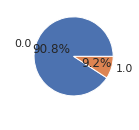

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


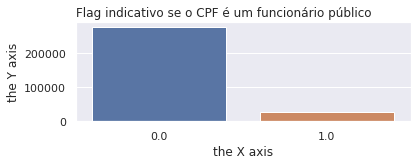


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.0915588611517717
Std: 0.2884026877675264
More Info: 
		""A informação foi selecionada como um indício se o CPF é funcionário público.""

		""Variável FUNCIONARIOPUBLICO: Flag indicativo se o CPF é um funcionário público""



In [21]:
why = '\n\t\t""A informação foi selecionada como um indício se o CPF é funcionário público.""\n'
var = '\n\t\t""Variável FUNCIONARIOPUBLICO: '+description('FUNCIONARIOPUBLICO')+'""\n'
plot(df, 'pizza', 'FUNCIONARIOPUBLICO', is_subplot=True, subplot_index=(2,1,1), y_axis_name=' ', x_axis_name=' ') 
plot(df, 'countplot', 'FUNCIONARIOPUBLICO', title=description('FUNCIONARIOPUBLICO'), is_subplot=True, subplot_index=(2,1,2), final_subplot=True, info=('FUNCIONARIOPUBLICO', 0,0,2,why+var), show_info=True)

## Univariate - Variável 11

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


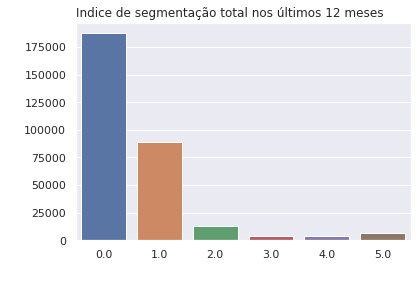


Distribution: Gaussian
Skew: Positive
Kurtosis: Mesokurtic
Mean: 0.5758429929712123
Std: 1.0010992661553337
More Info: 
		""A informação foi selecionada como indicativo de segmentação.""

		""Variável SEGMENTACAO: Indice de segmentação total nos últimos 12 meses""



In [22]:
why = '\n\t\t""A informação foi selecionada como indicativo de segmentação.""\n'
var = '\n\t\t""Variável SEGMENTACAO: '+description('SEGMENTACAO')+'""\n'
plot(df, 'countplot', "SEGMENTACAO", title=description('SEGMENTACAO'), y_axis_name=' ', x_axis_name=' ', info=('SEGMENTACAO', 0,0,1,why+var), show_info=True) 

## Univariate - Variável 12

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


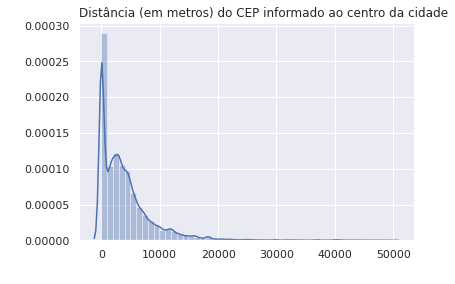


Distribution: Gaussian
Skew: Positive
Kurtosis: Mesokurtic
Mean: 4037.8931249650354
Std: 4813.157985541082
More Info: 
		""A informação foi selecionada como indicativo de proximidade ao centro, pois pode indicar um maior custo de vida.""

		""Variável DISTCENTROCIDADE: Distância (em metros) do CEP informado ao centro da cidade""



In [23]:
why = '\n\t\t""A informação foi selecionada como indicativo de proximidade ao centro, pois pode indicar um maior custo de vida.""\n'
var = '\n\t\t""Variável DISTCENTROCIDADE: '+description('DISTCENTROCIDADE')+'""\n'
plot(df, 'distplot', "DISTCENTROCIDADE", title=description('DISTCENTROCIDADE'), y_axis_name=' ', x_axis_name=' ', info=('DISTCENTROCIDADE', 0,0,1,why+var), show_info=True) 

## Univariate - Variável 13

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


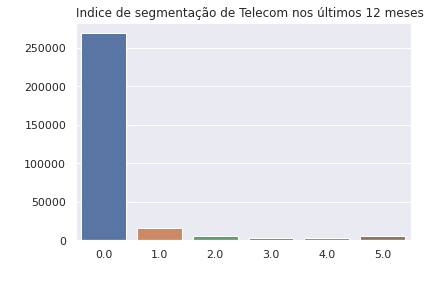


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.26120913610528673
Std: 0.8971520067605976
More Info: 
		""A informação foi selecionada como indicativo de segmentação telefônica.""

		""Variável SEGMENTACAOTELECOM: Indice de segmentação de Telecom nos últimos 12 meses""



In [24]:
why = '\n\t\t""A informação foi selecionada como indicativo de segmentação telefônica.""\n'
var = '\n\t\t""Variável SEGMENTACAOTELECOM: '+description('SEGMENTACAOTELECOM')+'""\n'
plot(df, 'countplot', "SEGMENTACAOTELECOM", title=description('SEGMENTACAOTELECOM'), y_axis_name=' ', x_axis_name=' ', info=('SEGMENTACAOTELECOM', 0,0,2,why+var), show_info=True) 

## Univariate - Variável 14

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


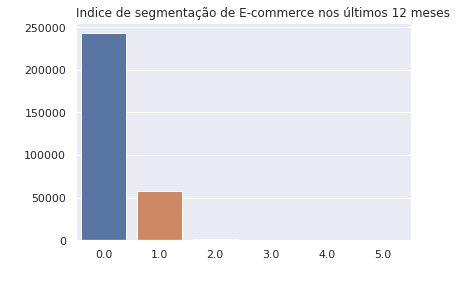


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.21007899144149492
Std: 0.4434333270602802
More Info: 
		""A informação foi selecionada como indicativo de segmentação de e-commerce.""

		""Variável SEGMENTACAOECOM: Indice de segmentação de E-commerce nos últimos 12 meses""



In [25]:
why = '\n\t\t""A informação foi selecionada como indicativo de segmentação de e-commerce.""\n'
var = '\n\t\t""Variável SEGMENTACAOECOM: '+description('SEGMENTACAOECOM')+'""\n'
plot(df, 'countplot', "SEGMENTACAOECOM", title=description('SEGMENTACAOECOM'), y_axis_name=' ', x_axis_name=' ', info=('SEGMENTACAOECOM', 0,0,2,why+var), show_info=True) 

## Univariate - Variável 15

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


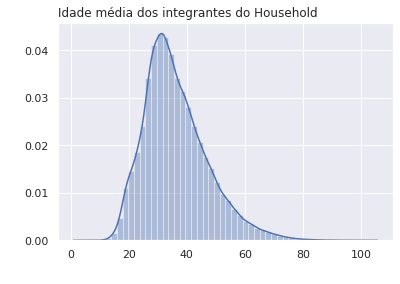


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 36.211859312766016
Std: 10.921494420855883
More Info: 
		""A informação foi selecionada como indicativo de idade do household e a propensão de não ter um emprego.""

		""Variável MEDIAIDADECASA: Idade média dos integrantes do Household""



In [26]:
why = '\n\t\t""A informação foi selecionada como indicativo de idade do household e a propensão de não ter um emprego.""\n'
var = '\n\t\t""Variável MEDIAIDADECASA: '+description('MEDIAIDADECASA')+'""\n'
plot(df, 'distplot', "MEDIAIDADECASA", title=description('MEDIAIDADECASA'), y_axis_name=' ', x_axis_name=' ', info=('MEDIAIDADECASA', 0,0,2,why+var), show_info=True) 

## Univariate - Variável 16

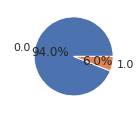

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


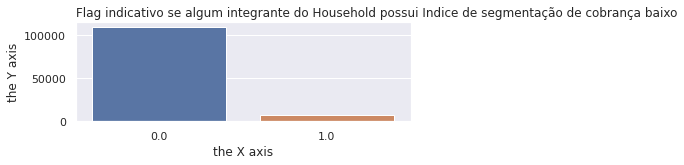


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.06038570157787009
Std: 0.2382010886835263
More Info: 
		""A informação foi selecionada como um indício se o CPF household possuí segmentação de cobrança baixa.""

		""Variável COBRANCABAIXOCASA: Flag indicativo se algum integrante do Household possui Indice de segmentação de cobrança baixo""



In [27]:
why = '\n\t\t""A informação foi selecionada como um indício se o CPF household possuí segmentação de cobrança baixa.""\n'
var = '\n\t\t""Variável COBRANCABAIXOCASA: '+description('COBRANCABAIXOCASA')+'""\n'
plot(df, 'pizza', 'COBRANCABAIXOCASA', is_subplot=True, subplot_index=(2,1,1), y_axis_name=' ', x_axis_name=' ') 
plot(df, 'countplot', 'COBRANCABAIXOCASA', title=description('COBRANCABAIXOCASA'), is_subplot=True, subplot_index=(2,1,2), final_subplot=True, info=('COBRANCABAIXOCASA', 0,0,2,why+var), show_info=True)

## Univariate - Variável 17

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


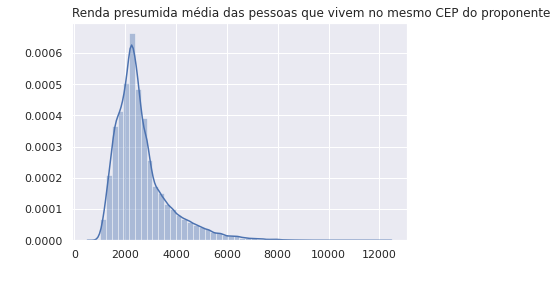


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 2634.9950051969286
Std: 1076.0975220267758
More Info: 
		""A informação foi selecionada como indicativo de renda média por CEP.""

		""Variável MEDIARENDACEP: Renda presumida média das pessoas que vivem no mesmo CEP do proponente""



In [28]:
why = '\n\t\t""A informação foi selecionada como indicativo de renda média por CEP.""\n'
var = '\n\t\t""Variável MEDIARENDACEP: '+description('MEDIARENDACEP')+'""\n'
plot(df, 'distplot', "MEDIARENDACEP", title=description('MEDIARENDACEP'), y_axis_name=' ', x_axis_name=' ', info=('MEDIARENDACEP', 0,0,2,why+var), show_info=True) 

## Univariate - Variável 18

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


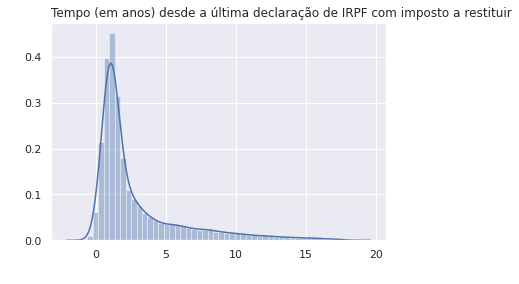


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 2.8719666854934145
Std: 3.2540142103996
More Info: 
		""A informação foi selecionada como indicativo de anos até última restitução.""

		""Variável ANOSULTIMARESTITUICAO: Tempo (em anos) desde a última declaração de IRPF com imposto a restituir""



In [29]:
why = '\n\t\t""A informação foi selecionada como indicativo de anos até última restitução.""\n'
var = '\n\t\t""Variável ANOSULTIMARESTITUICAO: '+description('ANOSULTIMARESTITUICAO')+'""\n'
plot(df, 'distplot', "ANOSULTIMARESTITUICAO", title=description('ANOSULTIMARESTITUICAO'), y_axis_name=' ', x_axis_name=' ', info=('ANOSULTIMARESTITUICAO', 0,0,2,why+var), show_info=True) 

## Univariate - Variável 19

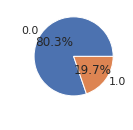

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


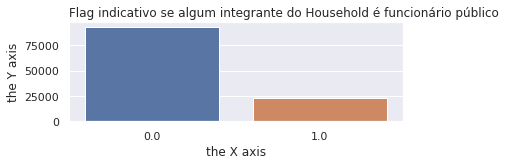


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.19743671678656868
Std: 0.3980663614869503
More Info: 
		""A informação foi selecionada como um indício se uma casa possuí funcionário público.""

		""Variável FUNCIONARIOPUBLICOCASA: Flag indicativo se algum integrante do Household é funcionário público""



In [30]:
why = '\n\t\t""A informação foi selecionada como um indício se uma casa possuí funcionário público.""\n'
var = '\n\t\t""Variável FUNCIONARIOPUBLICOCASA: '+description('FUNCIONARIOPUBLICOCASA')+'""\n'
plot(df, 'pizza', 'FUNCIONARIOPUBLICOCASA', is_subplot=True, subplot_index=(2,1,1), y_axis_name=' ', x_axis_name=' ') 
plot(df, 'countplot', 'FUNCIONARIOPUBLICOCASA', title=description('FUNCIONARIOPUBLICOCASA'), is_subplot=True, subplot_index=(2,1,2), final_subplot=True, info=('FUNCIONARIOPUBLICOCASA', 0,0,2,why+var), show_info=True)

## Univariate - Variável 20

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


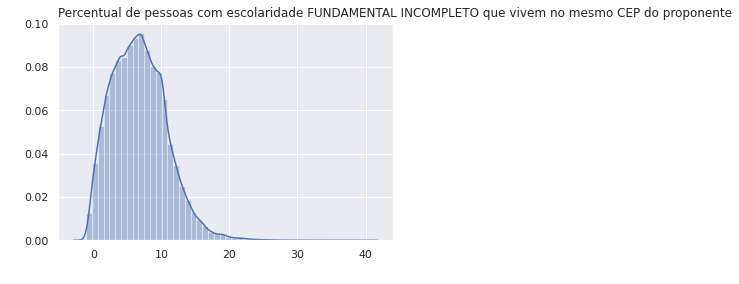


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 6.750432806991888
Std: 4.0113788513812185
More Info: 
		""A informação foi selecionada como indicativo de pessoas com o ensino fundamental incompleto.""

		""Variável PERCENTFUNDAMENTALCEP: Percentual de pessoas com escolaridade FUNDAMENTAL INCOMPLETO que vivem no mesmo CEP do proponente""



In [31]:
why = '\n\t\t""A informação foi selecionada como indicativo de pessoas com o ensino fundamental incompleto.""\n'
var = '\n\t\t""Variável PERCENTFUNDAMENTALCEP: '+description('PERCENTFUNDAMENTALCEP')+'""\n'
plot(df, 'distplot', "PERCENTFUNDAMENTALCEP", title=description('PERCENTFUNDAMENTALCEP'), y_axis_name=' ', x_axis_name=' ', info=('PERCENTFUNDAMENTALCEP', 0,0,2,why+var), show_info=True) 

# Multivariate data analysis

In this section, you should plot at least 8 multivariate visualizations. The key here is to investigate underlying correlations and behaviors in the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **TWO** non-obvious behavior in data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. The key here is to explain why you are choosing those specific variables together and what you are expecting to find.
2. Determine what kind of visualization is the most suited.
3. Report the findings and whether they corroborate or not the aforestated hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Important

It is strictly forbidden to create multivariate visualizations using variables that were not used in the previous section (univariate analysis).

In [32]:
# again, feel free to place as many cells to plot the visualizations, 
# as well as describe to the main findings

## Multivariate - Analysis 1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


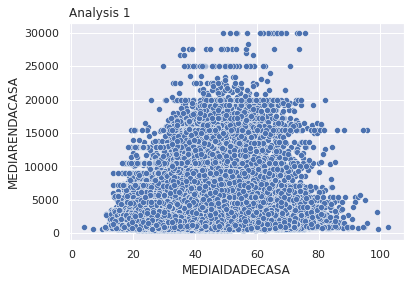


Hipótese: Quanto maior a idade média de uma casa, maior a renda média.

Resultado: Os resultados favorecem a hipótese.



In [33]:
plot(df, "scatterplot", "MEDIAIDADECASA", 'MEDIARENDACASA', x_axis_name='MEDIAIDADECASA', y_axis_name='MEDIARENDACASA', title="Analysis 1")
print("\nHipótese: Quanto maior a idade média de uma casa, maior a renda média.")
print("\nResultado: Os resultados favorecem a hipótese.\n")

## Multivariate - Analysis 2

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


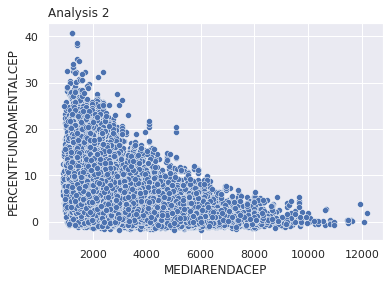


Hipótese: Quanto maior a média renda do CEP, menor o índice de inconclusão do ensino fundamental por CEP.

Resultado: Os resultados favorecem a hipótese.



In [34]:
plot(df, "scatterplot", "MEDIARENDACEP", 'PERCENTFUNDAMENTALCEP', x_axis_name='MEDIARENDACEP', y_axis_name='PERCENTFUNDAMENTALCEP', title='Analysis 2')
print("\nHipótese: Quanto maior a média renda do CEP, menor o índice de inconclusão do ensino fundamental por CEP.")
print("\nResultado: Os resultados favorecem a hipótese.\n")

## Multivariate - Analysis 3

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


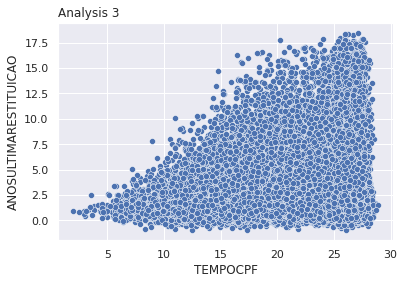


Hipótese: Quanto mais tempo o CPF está cadastrado, mais tempo desde a última restituição.

Resultado: Os resultados favorecem a hipótese.



In [35]:
plot(df, "scatterplot", "TEMPOCPF", 'ANOSULTIMARESTITUICAO', x_axis_name='TEMPOCPF', y_axis_name='ANOSULTIMARESTITUICAO', title='Analysis 3')
print("\nHipótese: Quanto mais tempo o CPF está cadastrado, mais tempo desde a última restituição.")
print("\nResultado: Os resultados favorecem a hipótese.\n")

## Multivariate - Analysis 4

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


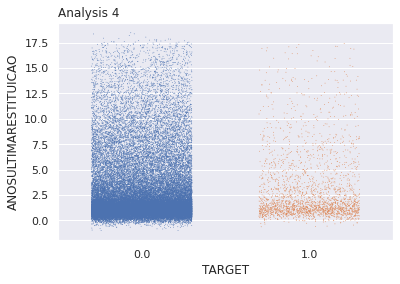


Hipótese: Quem não é inadimplente(1.0), em tese, restitui seus impostos com maior frequência.

Resultado: Os resultados favorecem a hipótese(Resultado não óbvio).



In [36]:
plot(df, "stripplot", "TARGET", 'ANOSULTIMARESTITUICAO', x_axis_name='TARGET', y_axis_name='ANOSULTIMARESTITUICAO', title='Analysis 4', options=[0.3, 0.8])
print("\nHipótese: Quem não é inadimplente(1.0), em tese, restitui seus impostos com maior frequência.")
print("\nResultado: Os resultados favorecem a hipótese(Resultado não óbvio).\n")

## Multivariate - Analysis 5

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


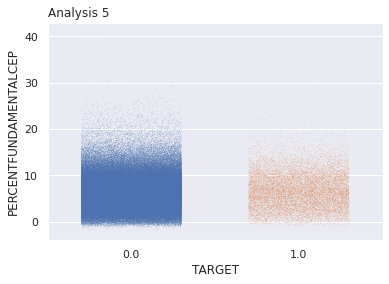


Hipótese: Quem não é inadimplente, está localizado em um CEP com mais pessoas com ensino fundamental completo.

Resultado: Os resultados não favorecem muito a hipótese.



In [37]:
plot(df, "stripplot",'TARGET', 'PERCENTFUNDAMENTALCEP', x_axis_name='TARGET', y_axis_name='PERCENTFUNDAMENTALCEP', title='Analysis 5', options=[0.3, 0.4])
print("\nHipótese: Quem não é inadimplente, está localizado em um CEP com mais pessoas com ensino fundamental completo.")
print("\nResultado: Os resultados não favorecem muito a hipótese.\n")

## Multivariate - Analysis 6

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


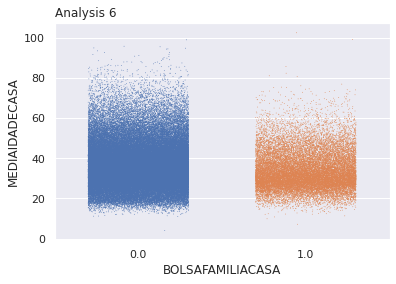


Hipótese: Famílias mais novas tendem a utilizar-se do Bolsa Família.

Resultado: Os resultados favorecem a hipótese.



In [38]:
plot(df, "stripplot", "BOLSAFAMILIACASA", 'MEDIAIDADECASA', x_axis_name='BOLSAFAMILIACASA', y_axis_name='MEDIAIDADECASA', title='Analysis 6', options=[0.3, 0.8])
print("\nHipótese: Famílias mais novas tendem a utilizar-se do Bolsa Família.")
print("\nResultado: Os resultados favorecem a hipótese.\n")

## Multivariate - Analysis 7

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


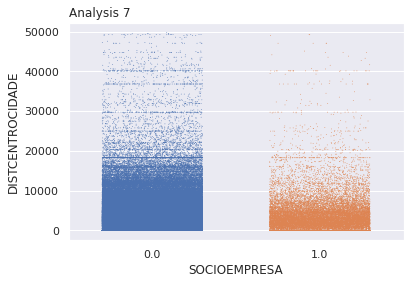


Hipótese: Sócios de empresas tendem a morar mais próximos aos centros de suas cidades.

Resultado: Os resultados favorecem a hipótese.



In [39]:
plot(df, 'stripplot', "SOCIOEMPRESA", 'DISTCENTROCIDADE', x_axis_name='SOCIOEMPRESA', y_axis_name='DISTCENTROCIDADE', title='Analysis 7', options=[0.3, 0.8])
print("\nHipótese: Sócios de empresas tendem a morar mais próximos aos centros de suas cidades.")
print("\nResultado: Os resultados favorecem a hipótese.\n")

## Multivariate - Analysis 8

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


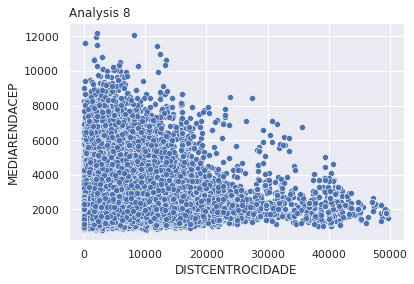


Hipótese: Quanto mais próximo do centro da cidade, maiores os gastos com o aluguel, logo maior deve ser a renda média.

Resultado: Os resultados favorecem a hipótese(Resultado não óbvio).



In [40]:
plot(df, 'scatterplot', "DISTCENTROCIDADE", 'MEDIARENDACEP', x_axis_name='DISTCENTROCIDADE', y_axis_name='MEDIARENDACEP', title='Analysis 8', options=[0.3, 0.8])
print("\nHipótese: Quanto mais próximo do centro da cidade, maiores os gastos com o aluguel, logo maior deve ser a renda média.")
print("\nResultado: Os resultados favorecem a hipótese(Resultado não óbvio).\n")

# Final Plots

In this section, you need to enhance 3 multivariate visualizations that were presented in the previous section of the report.
The key here is to enhance these visualizations with the goal of presenting them for an audience that is not familiar with the dataset used or with data analysis.
**Therefore, make sure that its size, colors, textures, etc, are appropriate are convey the right information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot
2. Provide a description of the visualization, including the main findings that we can extract from it


**Hint: take a look at the checklist also made available based on the work of Evergreen.**

## Final Plot 1



Quanto Maior a Média Renda do CEP, Menor o Índice de Inconclusão do Ensino Fundamental por CEP





/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


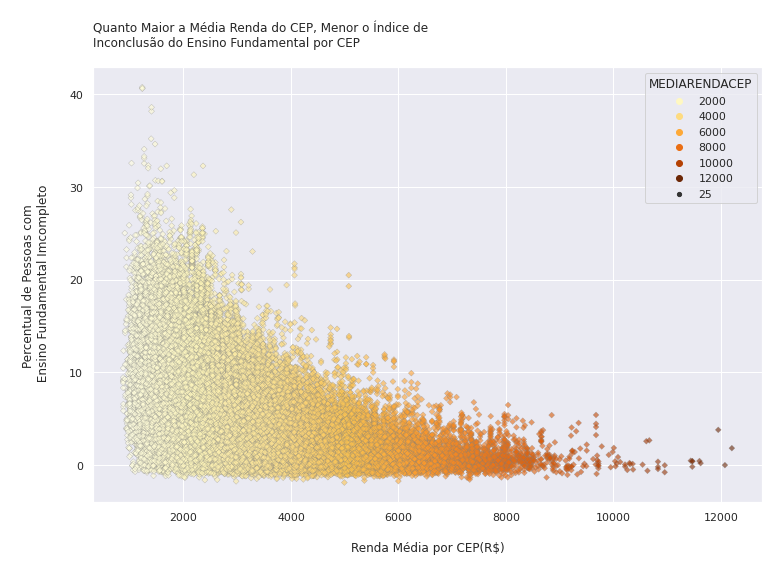


Descrição da visualização:

	Nossa equipe encontrou uma correlação entre a renda média por CEP e o percentual de 
	Pessoas com Ensino Fundamental Incompleto. Como apontado no gráfico acima, é possível 
	notar que, quanto maior a renda média por CEP, menor é o grau de pessoas com o ensino 
	fundamental incompleto neste mesmo CEP.




In [41]:
print("\n\nQuanto Maior a Média Renda do CEP, Menor o Índice de Inconclusão do Ensino Fundamental por CEP\n")

plot(df, "scatterplot_f", "MEDIARENDACEP", 'PERCENTFUNDAMENTALCEP', x_axis_name='\nRenda Média por CEP(R$)\n', define_size=True, sizeP=(12,8),
    y_axis_name='\nPercentual de Pessoas com\n Ensino Fundamental Imcompleto\n', 
    title='\nQuanto Maior a Média Renda do CEP, Menor o Índice de \nInconclusão do Ensino Fundamental por CEP\n')

text = ["\nDescrição da visualização:\n\n\tNossa equipe encontrou uma correlação entre a renda média por CEP e o percentual de \n\tPessoas",
        "com Ensino Fundamental Incompleto. Como apontado no gráfico acima, é possível \n\tnotar que, quanto",
        "maior a renda média por CEP, menor é o grau de pessoas com o ensino \n\tfundamental incompleto neste mesmo CEP.\n\n"]
print('\033[1m'+'\033[97m'+' '.join(text)+'\033[0m')

## Final Plot 2



Pessoas Adimplentes Restituem Seus Impostos Mais Frequentemente





/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


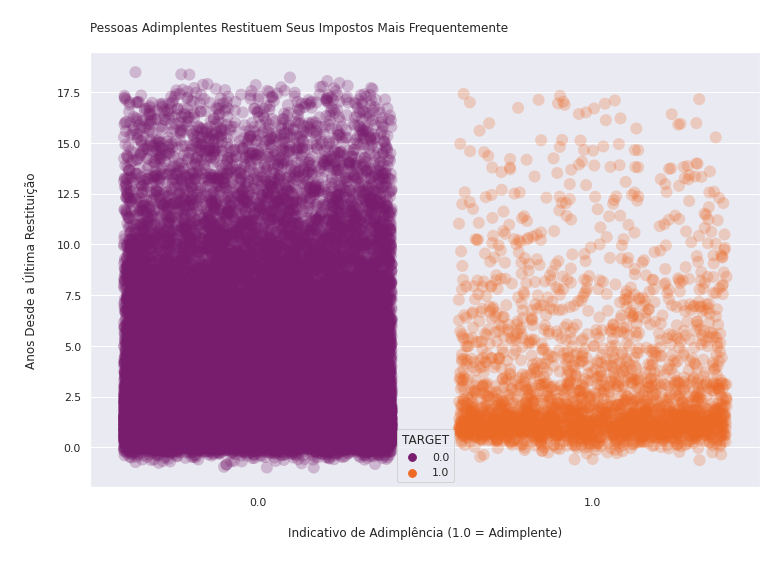


Descrição da visualização:

	Nossa equipe encontrou uma correlação indicativa de que pessoas adimplentes tendem 
	a restistuir seus impostos em até 5 anos, o que se torna bastante expressivo quando 
	as densidades dos grupos(Inadimplentes = 0.0, e adimplentes = 1.0) são comparadas. 
	Ressaltando que os inadimplentes na sua maioria não restituem seus impostos antes 
	de um período de 10 anos.



In [42]:
print("\n\nPessoas Adimplentes Restituem Seus Impostos Mais Frequentemente\n")

plot(df, "stripplot_f", "TARGET", 'ANOSULTIMARESTITUICAO', y_axis_name='\nAnos Desde a Última Restituição\n', define_size=True, sizeP=(12,8),
     x_axis_name='\nIndicativo de Adimplência (1.0 = Adimplente)\n', title='\nPessoas Adimplentes Restituem Seus Impostos Mais Frequentemente\n')

text = ["\nDescrição da visualização:\n\n\tNossa equipe encontrou uma correlação indicativa de que pessoas adimplentes tendem",
        "\n\ta restistuir seus impostos em até 5 anos, o que se torna bastante expressivo quando", 
        "\n\tas densidades dos grupos(Inadimplentes = 0.0, e adimplentes = 1.0) são comparadas.",
        "\n\tRessaltando que os inadimplentes na sua maioria não restituem seus impostos antes",
        "\n\tde um período de 10 anos.\n"]
print('\033[1m'+'\033[97m'+' '.join(text)+'\033[0m')

## Final Plot 3



Maior é a Renda Média por CEP Conforme Mais Próximo Está o CEP do Centro da Cidade





/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


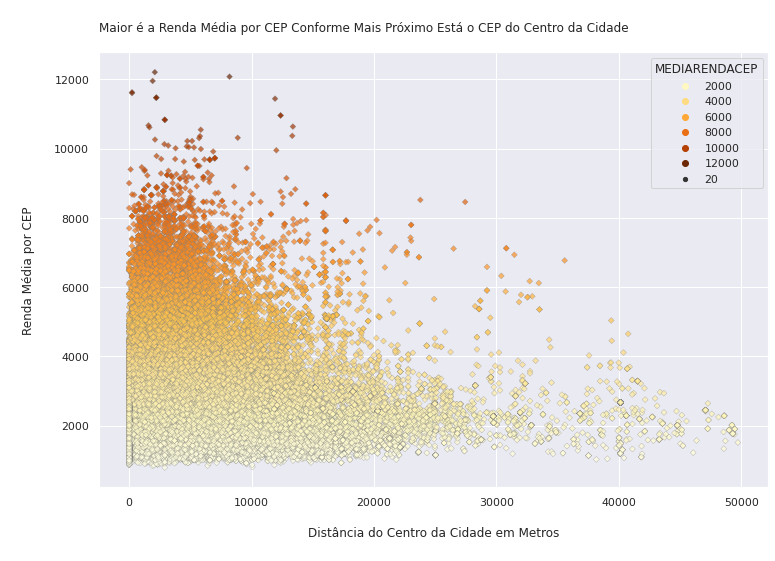


Descrição da visualização: 

	Nesta análise, a nossa equipe encontrou uma correlação entre o quão alta é a renda média 
	por CEP com relação a proximidade desse CEP ao centro da cidade, aumentando a renda conforme 
	mais próximo do centro. Isso deve ao fato de que, devido as condições de vida serem melhores 
	no centro de uma cidade geralmente, maiores são os custos de vida nas redondezas do centro 
	da cidade. Indicando, assim, uma necessidade de uma renda maior.



In [43]:
print("\n\nMaior é a Renda Média por CEP Conforme Mais Próximo Está o CEP do Centro da Cidade\n")

plot(df, 'scatterplot_f2', "DISTCENTROCIDADE", 'MEDIARENDACEP', define_size=True, sizeP=(12,8), x_axis_name='\nDistância do Centro da Cidade em Metros\n',
     y_axis_name='\nRenda Média por CEP\n', title='\nMaior é a Renda Média por CEP Conforme Mais Próximo Está o CEP do Centro da Cidade\n')

text = ["\nDescrição da visualização:",
        "\n\n\tNesta análise, a nossa equipe encontrou uma correlação entre o quão alta é a renda média",
        "\n\tpor CEP com relação a proximidade desse CEP ao centro da cidade, aumentando a renda conforme",
        "\n\tmais próximo do centro. Isso deve ao fato de que, devido as condições de vida serem melhores",
        "\n\tno centro de uma cidade geralmente, maiores são os custos de vida nas redondezas do centro",
        "\n\tda cidade. Indicando, assim, uma necessidade de uma renda maior.\n"
        ]
print('\033[1m'+'\033[97m'+' '.join(text)+'\033[0m')  

# Digest

In this section you should write down all the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2500 characters (no spaces).

Através do projeto semestral da matéria de Data Science no qual a equipe realizou a análise da base de dados fornecida, foi possível  extrair diversas informações contidas neste, como quantidade de CPF, E-mails, endereços números de celulares e telefones fixos, dentre muitas outras, e a partir dessas informações fomos capazes de traçar alguns desses dados, que utilizamos para gerar múltiplos gráficos onde pudemos visualizar preliminares que nos mostravam diversas informações estatísticas, comportamentos, similaridades, diferenças e outras várias informações.
Na análise de dados multivariada foram realizadas 8 análises:
  1.	MEDIAIDADECASA x MEDIARENDACASA -
Hipótese: Quanto maior a idade média de uma casa, maior a renda média. Embora os resultados favoreçam a hipótese, não acrescentou muito no nosso modelo.


  2.	MEDIARENDACEP x PERCENTFUNDAMENTALCEP -
Hipótese: Quanto maior a média renda do CEP, menor o índice de inconclusão do ensino fundamental por CEP. Resultados favoreceram a hipótese e ajudou no modelo.


  3.	TEMPOCPF x ANOSULTIMARESTITUICAO - 
Hipótese: Quanto mais tempo o CPF está cadastrado, mais tempo desde a última restituição. Embora os resultados favoreçam a hipótese teve pequeno impacto no modelo, porém gerou ruído.


  4.	ANOSULTIMARESTITUICAO x TARGET - 
Hipótese: Quem não é inadimplente(1.0), em tese, restitui seus impostos com maior frequência. Resultados favoreceram a hipótese, contudo não era o óbvio e não ajudou no modelo.


  5.	PERCENTFUNDAMENTALCEP x TARGET -
Hipótese: Quem não é inadimplente, está localizado em um CEP com mais pessoas com ensino fundamental completo. Embora os resultados não favoreceram a hipótese, ajudou no modelo.


  6.	BOLSAFAMILIACASA x MEDIAIDADECASA - 
Hipótese: Famílias mais novas tendem a utilizar-se do Bolsa Família. Embora os resultados favoreçam a hipótese, não teve efeito significativo.


  7.	SOCIOEMPRESA x DISTCENTROCIDADE -
Hipótese: Sócios de empresas tendem a morar mais próximos aos centros de suas cidades. Embora os resultados favoreçam a hipótese gerou mais ruído no modelo.


  8.	DISTCENTROCIDADE x MEDIARENDACEP - 
Hipótese: Quanto mais próximo do centro da cidade, maiores os gastos com o aluguel, logo maior deve ser a renda média. Resultados favoreceram a hipótese e ajudaram no modelo.
No Final Plot 1 analisamos as variáveis média da renda em relação a cada CEP e o percentual de pessoas que possuíam o ensino fundamental incompleto, que ajudaram muito no modelo e pudemos constatar que, quanto maior a renda média da casa, menor o índice de pessoas que não concluíram o ensino fundamental por CEP. Para a realização deste Plot aplicamos um scatterplot: gráfico de dispersão, que utiliza coordenadas cartesianas para exibir as duas variáveis de forma organizada.
No Final Plot 2 foi analisada a variável anos desde a última restituição, que não ajudou muito no modelo, porém foi constatado que as pessoas adimplentes restituem seus impostos com mais frequência do que as inadimplentes. Para este Plot aplicamos um stripplot: gráfico de dispersão onde uma variável é categórica, onde foi possível realizar uma comparação entre as pessoas adimplentes e inadimplentes em relação a restituição de impostos.

No Final Plot 3 examinamos as variáveis distância do centro da cidade em metros e renda média por CEP que ajudou no nosso modelo, e encontramos uma correlação que nos mostra que as maiores médias de rendas por CEP estão mais próximas do centro da cidade, e podemos concluir que pessoas de melhor condição financeira moram mais próximas do centro. Como no primeiro Plot, utilizamos o mesmo estilo de gráfico para termos uma melhor análise de cada CEP.
Algumas das variáveis presentes na base de dados se mostraram mais úteis do que outras, abaixo estão listadas algumas que se mostram úteis e outras nem tanto: 

  •	Variáveis que decepcionaram - QTDPESSOASCASA, PORTEEMPREGADOR, SEGMENTACAO, MEDIARENDACASA, COBRANCABAIXOCASA, ANOSULTIMARESTITUICAO.

  •	Variáveis que se revelaram muito úteis - QTDUTILITARIOMUNICIPIO, QTDCAMINHONETEMUNICIPIO.


# Machine Learning

In this section, you should test different machine learning approaches to **build** and **evaluate** your model.

**IMPORTANT: DO NOT FORGET TO REPORT YOUR PREDICTIONS FOR THE TEST DATA. YOU SHOULD BUILD AND EXPORT A FILE ACCORDING TO THE PROJECT DESCRIPTION WITH THE DEFAULTING PROBABILITIES!**

In [44]:
# Function to obtain KS value:
def computeKS(y_true, y_prob_positive):
    vals = list(zip(y_true, y_prob_positive))
    positives = []
    negatives = []
    for a, b in vals:
        if a == 0:
            negatives.append(b)
        else:
            positives.append(b)
    ks = 100.0 * stats.ks_2samp(positives, negatives)[0]
    return ks

In [77]:
# Criando um dataframe constante.
CONSTANT_DF = df.copy()


# ESSAS SÃO AS ÚNICAS COLUNAS UTILIZADAS:
dslice = [        
          
    'TEMPOCPF',  'FUNCIONARIOPUBLICO',  'QTDPESSOASCASA',  'COBRANCAMEDIOCASA',  'BOLSAFAMILIACASA',
    'FUNCIONARIOPUBLICOCASA',  
    'PERCENTFUNDAMENTALCEP',  
    'DISTCENTROCIDADE',  
    'QTDCELULAR', 
    'SEGMENTACAOCOBRANCA',
    'SEGMENTACAOFIN',  'SEGMENTACAOTELECOM',  
    'SOMARENDACASA',  
    'COBRANCABAIXOCASA',  'SEGMENTACAOFINMEDIACASA', 
    'IDADEMEDIACEP',  
    'PERCENTFEMCEP', 
    #'PERCENTANALFABETOCEP',
    'PERCENTBOLSAFAMILIACEP',  
    'PERCENTFUNCIONARIOPUBLICOCEP', 
    'MEDIARENDACEP',  
    'PIBMUNICIPIO',  
    'QTDCAMINHAOMUNICIPIO',  'PERCENTPOPZONAURBANA',  'IDHMUNICIPIO',
    'ESTIMATIVARENDA',  'BOLSAFAMILIA',  
    'DISTZONARISCO',	 
    'TELFIXOPROCON',  'INDICEEMPREGO',
    'PORTEEMPREGADOR',  'QTDCAMINHONETEMUNICIPIO',  'RESTITUICAOAGENCIAALTARENDA',  
    'QTDFONEFIXO', 
    'MENORIDADECASA',
    'MEDIARENDACASA',   
    'PERCENTMEDIOCEP',
    'CELULARPROCON'

]



# Removendo linhas da coluna TARGET com valores faltantes:
try:
    CONSTANT_DF['TARGET'].dropna()
except:
    print()



# Selecionando valores para X e y:
df_selected = CONSTANT_DF[dslice].copy()
df_y_selected = CONSTANT_DF['TARGET'].copy()



# Imputando a mediana da coluna aos valores faltantes na coluna:
for i in df_selected.columns:
    df_selected[i] = df_selected[i].fillna(df_selected[i].quantile(0.5))



# Adicionando amostras ao dataframe:
samplers = {'RO': RandomOverSampler()}
x_values, y_values = samplers['RO'].fit_resample(df_selected, df_y_selected)



# Nomeando as colunas depois do processo de Sampling:
df_selected_on = pd.DataFrame()
for i in range(0, len(dslice)):
    df_selected_on[dslice[i]] = x_values[:,i]

df_selected_on['TARGET'] = y_values



# Dividindo o dataframe nos conjuntos treino e teste:
x_train, x_test, y_train, y_test = train_test_split(df_selected_on[dslice], df_selected_on['TARGET'], test_size=0.3) 



# Aplicando um Scaler ao conjunto x_train com fit_transform:
ss = StandardScaler().fit(x_train)
aux = ss.transform(x_train)
df_selected_on = pd.DataFrame(data=aux, columns=dslice)


# Aplicando um Scaler no x_test(com transform) e salvando x_test e x_train como dataframes:
x_train = df_selected_on[dslice]
x_test = ss.transform(x_test)
x_test = pd.DataFrame(data=x_test, columns=dslice)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [78]:
# Criando um classificador XGBoost:
xgb = XGBClassifier(
    tree_method='approx', eval_metric='logloss', n_jobs=-1, objective='binary:logistic', random_state=9,
    learning_rate=0.1, max_depth=8, n_estimators=50, gamma=0.1, alpha=0.1
) 

In [79]:
# Treinando o classificador:

message = ['\nVocê deseja treinar o modelo(Y)? Ele leva 2094 segundos para treinar,'
           '\ncaso não deseje treiná-lo, você pode utilizar o último modelo salvo'
           ' no google drive do projeto(arquivo.model)(N).\n\n(Y/N)']

choice = input(message)

print('\n')


## Sempre execute a celula de criação do classificador antes de executar essa.
## Falhas de ambiente podem ocorrer caso o classificador não seja inicializado.


if choice == "Y":
    print('Choice = "Y"\n\nTreinando o modelo...\n')

    xgb.fit(x_train, y_train)    # Aproximadamente, 2094 segundos de execução.


    # Clique em RAM / DISCO no ambiente Colab para checar o tempo
    # desde a última execução: esse é o tempo decorrido até o momento desde o
    # início do fit. Lembre-se que demora, aproximadamente, 30 minutos.


    xgb.save_model('xgb_clf.model') # Salvando o modelo treinado.


    # O modelo será baixado em sua máquina: 
    files.download('xgb_clf.model') 
    # Você pode utilizar o mesmo nome salvo para baixar o modelo
    # se a sessão em que salvou for a mesma em que for baixar.


elif choice == "N":
    print('Choice = "N"\n\nBaixando o modelo...', end='')

    # Acesso ao arquivo no google drive:
    XGB_MODEL_FILE_LINK = "https://drive.google.com/file/d/1t5O_kCXY_uNNn1pZZF4A7JANwl1B3CGC/view?usp=sharing"
    id_xgb_model = XGB_MODEL_FILE_LINK.split('/')[-2]

    downloaded = drive.CreateFile({'id':id_xgb_model})
    downloaded.GetContentFile('xgb_clf_34ks.model')  # Criando arquivo em ambiente e salvando com este nome.

    xgb.load_model('xgb_clf_34ks.model') # Montando o classificador a partir do arquivo.
    print(" Pronto!\n\n")
    
    ## Este Modelo foi obtido durante a execução deste template, a equipe então salvou o modelo
    ## e o disponibilizou no google drive; como prova de veracidade, enviaremos o arquivo .model junto aos 
    ## outros arquivos na submissão. O arquivo no drive não será mudado e poderá ser usado como assemble para
    ## a árvore xgboost.
    
else:
    print('Comando não foi avaliado, use "Y" ou "N".\n')




Você deseja treinar o modelo(Y)? Ele leva 2094 segundos para treinar,
caso não deseje treiná-lo, você pode utilizar o último modelo salvo no google drive do projeto(arquivo.model)(N).

(Y/N)Y


Choice = "Y"

Treinando o modelo...



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

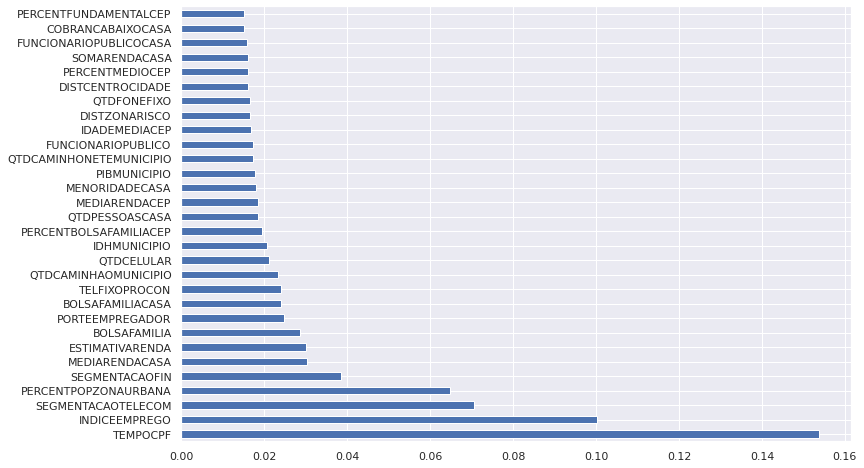

In [80]:
importancias = pd.Series(data=xgb.feature_importances_, index=df[dslice].columns.values)
importancias.sort_values(ascending=False).nlargest(30).plot(kind='barh')

In [81]:
## Observação: nos nossos testes, os modelos que foram baixados do google drive 
##             obtiveram 76.18 de ks aproximadamente;
##             já os modelos que foram executados no ambiente obtiveram 88.28 de 
##             ks aproximadamente. Para a obtenção de predições para o conjunto 
##             de dados teste, portanto, a equipe utilizou o modelo executado no 
##             ambiente e esperou 30 minutos para obter o resultado.

y_pred = xgb.predict_proba(x_test)[:, 1] # Coletando predições para x_test.
print("KS do modelo: ", computeKS(y_test, y_pred),"\n") # Calculando KS para a predição feita.

KS do modelo:  34.62420055682775 



In [82]:
## Aplicando o modelo xgboost ao conjunto de dados teste:

CONSTANT_DF_TEST = df_test.copy()



# Imputando a mediana da coluna aos valores faltantes na coluna:
for i in CONSTANT_DF_TEST[dslice].columns:
    CONSTANT_DF_TEST[i] = CONSTANT_DF_TEST[i].fillna(CONSTANT_DF[i].quantile(0.5))



# Selecionando as colunas dslice do conjunto de dados teste e
# transformando os dados com Scaler ss.
data = ss.transform(CONSTANT_DF_TEST[dslice])

# Convertendo para DataFrame para realizar predição:
data = pd.DataFrame(data=data, columns=dslice)

data_pred = xgb.predict_proba(data)[:, 1] # Coletando predições.


# Salvando as predições em um arquivo .csv:
df_output_maniacs = pd.DataFrame({'Maniacs': data_pred})
df_output_maniacs.to_csv('Maniacs.csv', index=False)


files.download('Maniacs.csv')  # Baixando as predições em um arquivo .csv.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Future work

In this cell, please provide at least 3 different ideas that you would like to pursuit within this dataset. That may include, for example, the use of machine learning techniques towards a goal, or analyzing variables that you had no time to during this work. 
Please provide **details** on how you would tackle this problem and provide specifics on which techniques should be used for such purposes.
This section should contain, at least, 2500 characters (no spaces).

Na última parte do trabalho foram usadas técnicas de machine learning para predição de classes para prevermos os clientes inadimplentes da base de dados. Na base de dados de teste, a coluna “TARGET” delimita a classe correta a ser prevista onde zeros simbolizam os bons pagadores e uns simbolizam os maus pagadores. Após treinar o algoritmo com a base de treino o objetivo era usá-lo para prever o as classes das instâncias na base de teste, exportando, como resultado, um arquivo descrevendo a probabilidade de que cada um dos pedidos seja um mal pagador.

Para trabalhos futuros poderíamos testar mais possibilidades de alterações com Scaling e Standardization como o algoritmo de RobustScaler, para uma possível melhor adaptação com os diversos outliers da base. Diferentes técnicas para adaptação com os vários valores faltantes que haviam na base também seriam dignos de atenção futura, no presente trabalho apenas substituímos os valores faltantes das colunas selecionadas por suas respectivas medianas, outra técnica a ser explorada, por exemplo, envolveria a seleção de atributos, excluído estrategicamente colunas que apresentassem alta taxa de valores faltantes. Além disso, principalmente por falta de tempo, futuramente, poderíamos realizar uma análise mais profunda em algumas variáveis como “QTDPESSOASCASA”, e “PORTEEMPREGADOR” que inicialmente se mostraram interessantes apenas pelo seu nome e contexto, porém após a análise utilizando pca gerou resultados que não agregaram para um bom resultado, poderíamos ter encontrado melhores componentes de pca que possivelmente iriam contribuir positivamente. Por esse motivo resolvemos optar por variáveis que se revelaram muito mais úteis, sendo necessário menos análises profundas, como “QTDCAMINHONETEMUNICIPIO”. O empenho em analisar a estrutura e organização profunda desses dados talvez venha a ressaltar a relatividade das diretrizes de suas análises para o futuro.
Para resolver parcialmente o nosso principal problema, a falta de tempo, seria interessante a utilização do XGBoost com GPU, para melhorar consideravelmente a performance das análises, e assim reduzindo seu tempo de processamento, possibilitando um maior número de estimadores no mesmo tempo disponível

As experiências acumuladas demonstram que o entendimento das metas propostas causa impacto indireto na reavaliação das diretrizes de desenvolvimento para o futuro. Assim mesmo, a valorização de features é uma das consequências do levantamento das variáveis envolvidas. Pensando mais a longo prazo, o desenvolvimento contínuo de distintas formas de atuação apresenta tendências no sentido de aprovar a manutenção dos modos de operação usados. Do mesmo modo, a necessidade de renovação processual facilita a criação dos métodos utilizados na avaliação de resultados. Neste sentido, a necessidade de renovação processual assume importantes posições no estabelecimento dos índices pretendidos.





# Final Steps


1. Save this report as a jupyter notebook (`.ipynb`)
2. Save a copy of this report as a PDF file (`.pdf`)
3. Copy the dataset
4. Zip it all together within a single file (`<your_name>.zip`)
5. Send it over using Blackboard.